# Data Mining Final Project
## Max Reinheimer dos Santos Denig
Data Mining analysis of fictional Insurance Company data.
Made on Juptyer Notebook.

In [1]:
import pandas as pd                # Pandas for dealing with DataFrames.
import numpy as np                 # Numpy package.
import matplotlib.pyplot as plt    # Graphs module from matplotlib.
import seaborn as sns              # For plotting more sophisticated graphs.
import random                      # Random package, for setting seeds.

from sklearn.cluster import KMeans # kmeans function from sklearn package.
from sklearn.preprocessing import StandardScaler # Scaling function from sklearn package.
from sklearn.decomposition import PCA # For working with PCA.
from sklearn.cluster import AgglomerativeClustering  # For agglomerative clustering.
from sklearn import mixture # For EM Clustering (GaussianMixture).
import sklearn.metrics as sm  # Metrics from sklearn package.
from scipy.cluster.hierarchy import dendrogram, linkage # To work with Hierarchical dendograms.
from collections import Counter # For counting number of elements in each cluster.
from sklearn.cluster import MeanShift, estimate_bandwidth # Mean-Shift Clustering.
from kmodes.kmodes import KModes # NEEDS INSTALLIN ON ANACONDA PROMPT: pip install kmodes

#from google.colab import files     # Packting to run in Colab  COLAB ONLY


## 1 - Importing Data and Setting up Options

In [4]:
data = pd.read_csv("\\A2Z Insurance.csv") # Path to the .csv file. 
                                                                                 # Change this for your PC.
    
pd.options.display.float_format = '{:.2f}'.format # Change float options for decimals shown.

random.seed(2018) # Setting Seed for the entire run of the code, in case some algorithm does not already have a seed parameter.

## 2 - Analyzing and Cleaing data

### 2.1 - Descriptive Statistics

In [5]:
data.iloc[:, [0, 1, 3, 6, 7, 8, 9, 10, 11, 12]].describe()

,Customer Identity,First Policy´s Year,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life
count,10296.00,10266.00,10275.00,10296.00,10296.00,10262.00,10296.00,10253.00,10192.00
mean,5148.50,1991.06,0.71,177.89,0.74,300.47,210.43,171.58,41.86
std,2972.34,511.27,0.46,1945.81,2.92,211.91,352.60,296.41,47.48
min,1.00,1974.00,0.00,-165680.42,0.00,-4.11,-75.00,-2.11,-7.00
25%,2574.75,1980.00,0.00,-9.44,0.39,190.59,49.45,111.80,9.89
50%,5148.50,1986.00,1.00,186.87,0.72,298.61,132.80,162.81,25.56
75%,7722.25,1992.00,1.00,399.78,0.98,408.30,290.05,219.82,57.79
max,10296.00,53784.00,1.00,11875.89,256.20,11604.42,25048.80,28272.00,398.30


### 2.2 - Missing and "strange"/extreme values

##### 2.2.1 - Missing values

In [6]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = df.isnull().sum() / len(df) * 100
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
                                                              "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    return mis_val_table_ren_columns

missing_values_table(data)

Your selected dataframe has 14 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
Premiums in LOB: Life,104,1.00
Premiums in LOB: Work Compensations,86,0.80
Premiums in LOB: Health,43,0.40
Gross Monthly Salary,36,0.30
Premiums in LOB: Motor,34,0.30
First Policy´s Year,30,0.30
Has Children (Y=1),21,0.20
Brithday Year,17,0.20
Educational Degree,17,0.20
Geographic Living Area,1,0.00


##### 2.2.2 - "Strange"/outliers values

We should remove outliers, as they are highly prejudicial to K-Means results, since the outliers are going to pull the centroid of the clusters.

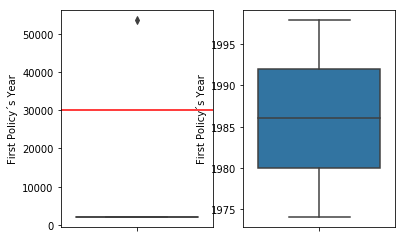

In [7]:
fig, ax =plt.subplots(1,2)
sns.boxplot(data['First Policy´s Year'].loc[data['First Policy´s Year'] <= 90000].dropna(), orient="v", whis=1.0, ax=ax[0])
ax[0].axhline(y=30000, color='r')
sns.boxplot(data['First Policy´s Year'].loc[data['First Policy´s Year'] <= 30000].dropna(), orient="v", whis=1.0, ax=ax[1])


plt.show()

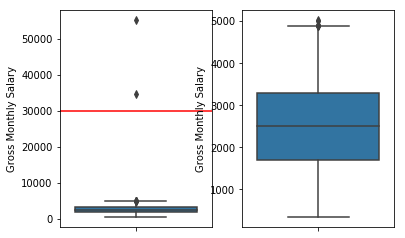

In [8]:
fig, ax =plt.subplots(1,2)
sns.boxplot(data['Gross Monthly Salary'].loc[data['Gross Monthly Salary'] <= 90000].dropna(), orient="v", whis=1.0, ax=ax[0])
ax[0].axhline(y=30000, color='r')
sns.boxplot(data['Gross Monthly Salary'].loc[data['Gross Monthly Salary'] <= 30000].dropna(), orient="v", whis=1.0, ax=ax[1])


plt.show()

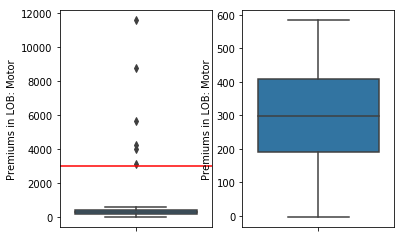

In [9]:
fig, ax =plt.subplots(1,2)
sns.boxplot(data['Premiums in LOB: Motor'].loc[data['Premiums in LOB: Motor'] <= 90000].dropna(), orient="v", whis=1.0, ax=ax[0])
ax[0].axhline(y=3000, color='r')
sns.boxplot(data['Premiums in LOB: Motor'].loc[data['Premiums in LOB: Motor'] <= 3000].dropna(), orient="v", whis=1.0, ax=ax[1])

plt.show()

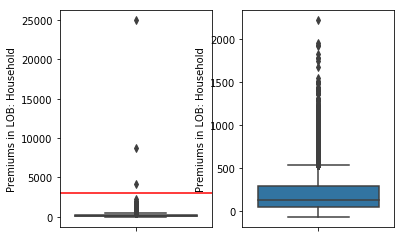

In [10]:
fig, ax =plt.subplots(1,2)
sns.boxplot(data['Premiums in LOB: Household'].loc[data['Premiums in LOB: Household'] <= 90000].dropna(), orient="v", whis=1.0, ax=ax[0])
ax[0].axhline(y=3000, color='r')
sns.boxplot(data['Premiums in LOB: Household'].loc[data['Premiums in LOB: Household'] <= 3000].dropna(), orient="v", whis=1.0, ax=ax[1])

plt.show()

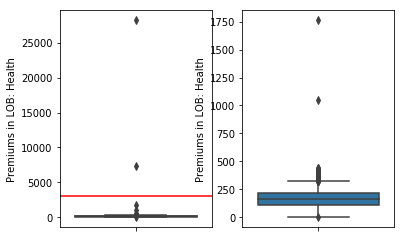

In [11]:
fig, ax =plt.subplots(1,2)
sns.boxplot(data['Premiums in LOB: Health'].loc[data['Premiums in LOB: Health'] <= 90000].dropna(), orient="v", whis=1.0, ax=ax[0])
ax[0].axhline(y=3000, color='r')
sns.boxplot(data['Premiums in LOB: Health'].loc[data['Premiums in LOB: Health'] <= 3000].dropna(), orient="v", whis=1.0, ax=ax[1])

plt.show()

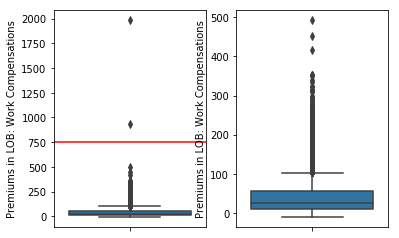

In [12]:
fig, ax =plt.subplots(1,2)
sns.boxplot(data['Premiums in LOB: Work Compensations'].loc[data['Premiums in LOB: Work Compensations'] <= 90000].dropna(), orient="v", whis=1.0, ax=ax[0])
ax[0].axhline(y=750, color='r')
sns.boxplot(data['Premiums in LOB: Work Compensations'].loc[data['Premiums in LOB: Work Compensations'] <= 750].dropna(), orient="v", whis=1.0, ax=ax[1])

plt.show()

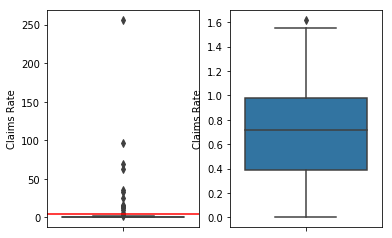

In [13]:
fig, ax =plt.subplots(1,2)
sns.boxplot(data['Claims Rate'].loc[data['Claims Rate'] <= 90000].dropna(), orient="v", whis=1.0, ax=ax[0])
ax[0].axhline(y=4, color='r')
sns.boxplot(data['Claims Rate'].loc[data['Claims Rate'] <= 4].dropna(), orient="v", whis=1.0, ax=ax[1])

plt.show()

C:\Users\maxde\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


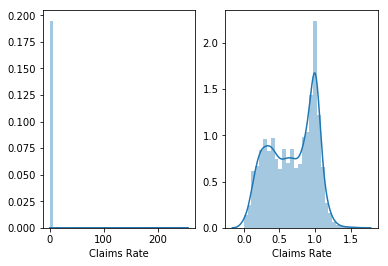

In [14]:
fig, ax =plt.subplots(1,2)
sns.distplot(data['Claims Rate'].loc[data['Claims Rate'] < 2000].dropna(), kde=True, hist=True, ax=ax[0])
sns.distplot(data['Claims Rate'].loc[data['Claims Rate'] < 4].dropna(),
             kde=True, hist=True, ax=ax[1])

plt.show()

It is clear in the graphs that these variables need some rows removed in order to remove these extreme values. These extreme values could interfere and harm our clustering analysis (K-Means specially).  

In [15]:
n0 = data.shape[0] # Storing oiriginal size of dataset.
data = data[data["First Policy´s Year"]<3000] # Removing 1 extreme value in the first year of policy.
data = data[data["Gross Monthly Salary"]<30000] # Removing the 2 extreme values present in Gross Monthly Salary.
data = data[data["Premiums in LOB: Motor"]<3000] # Removing some extreme values in the Premiums in LOB: Motor.
data = data[data["Premiums in LOB: Household"]<3000] # Removing 3 extreme values in the Premiums in LOB: Household.
data = data[data["Premiums in LOB: Health"]<3000] # Removing 2 extreme values in the Premiums in LOB: Health.
data = data[data["Premiums in LOB: Work Compensations"]<750] # Removing 2 extreme values in the Premiums in LOB: Work Compensations.
data = data[data["Claims Rate"] < 4] # Removing enough extreme values so the distribution of Claims Rate is close enough to a Gaussian one.

##### 2.2.3 - Percentage of Removed Data

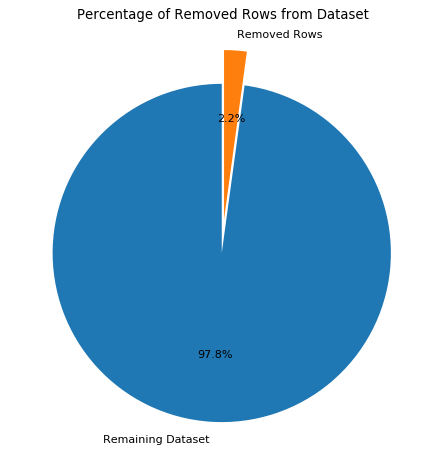

In [16]:
nl = n0-data.shape[0] # Number of remover rows.

d = [data.shape[0], nl]
explode = (0.1, 0.1)
labels = ['Remaining Dataset', 'Removed Rows']

plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
plt.pie(d, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)


plt.title('Percentage of Removed Rows from Dataset')
plt.show()

### 2.3 - Correlation Between Variables

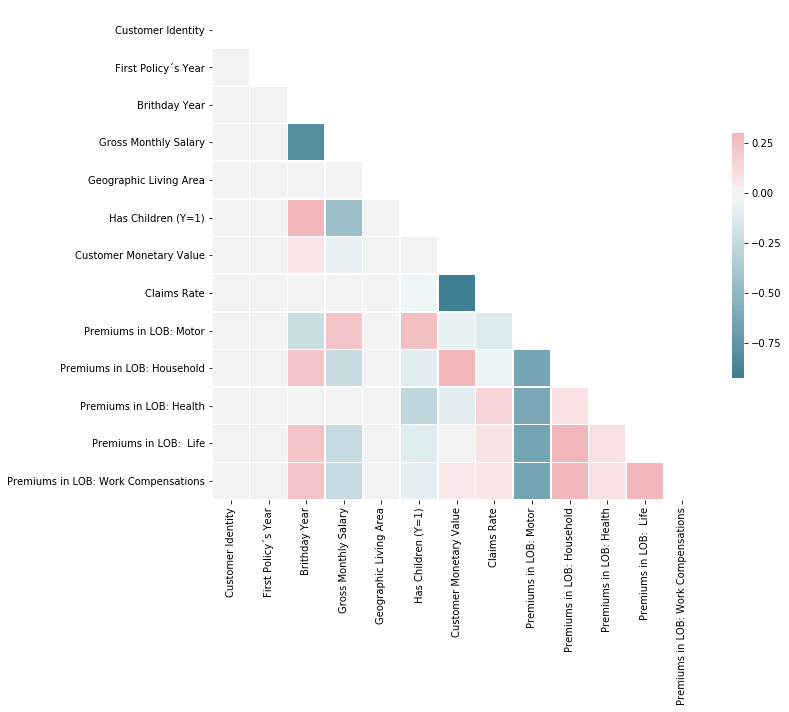

In [17]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

We can observe that Birthday Year shows a high negative correlation with Gross Monthly Salary. Since the variable Birthday Year shows dicrepancy with the variable First Policys Year, which does not show high correlation with any other variable, we will drop the variable Birthday Year.

In [18]:
print("Correlation between Birthday Year and Gross Monthly Salary:", corr.loc["Brithday Year", "Gross Monthly Salary"])
data.drop(columns=["Brithday Year"], inplace=True)
data.dropna(inplace=True)

Correlation between Birthday Year and Gross Monthly Salary: -0.8179541882403597


Since the variables Claims Rate and Monetary Value show a really high negative correlation as well, we should also remove one of them in order to reduce dimensionality and preserve orthogonality.

In [19]:
print("Correlation between Claims Rate and Customer Monetary Value:", corr.loc["Claims Rate", "Customer Monetary Value"])
data.drop(columns=["Customer Monetary Value"], inplace=True)
data.dropna(inplace=True)

Correlation between Claims Rate and Customer Monetary Value: -0.9248922135632475


### 2.4 - Creating new variables

- Create time variable subtracting the first year from 2016

In [20]:
data["Time"] = 2016-data["First Policy´s Year"]
data = data.drop(columns="First Policy´s Year") # Drop the original column.

* Creating dummy variable for Education:

In [21]:
aux_1 = pd.get_dummies(data["Educational Degree"], dummy_na = True)
data["ed_Basic"]   = aux_1.iloc[:, 0]
data["ed_HS"]      = aux_1.iloc[:, 1]
data["ed_BSc/MSc"] = aux_1.iloc[:, 2]
data["ed_Phd"]     = aux_1.iloc[:, 4]

* Creating dummy variable for Geographic live area:

In [22]:
aux_2 = pd.get_dummies(data["Geographic Living Area"], dummy_na = True)
data["GLA_1"] = aux_2.iloc[:, 0]
data["GLA_2"] = aux_2.iloc[:, 1]
data["GLA_3"] = aux_2.iloc[:, 2]
data["GLA_4"] = aux_2.iloc[:, 4]

* Creating Percentage of active contracts:

In [23]:
df_Premium = data.loc[:,('Premiums in LOB: Motor','Premiums in LOB: Household','Premiums in LOB: Health','Premiums in LOB:  Life','Premiums in LOB: Work Compensations')]
df_Premium['Premiums in LOB: Motor'] = df_Premium['Premiums in LOB: Motor'].apply(lambda x: 1 if x > 0 else 0)
df_Premium['Premiums in LOB: Household'] = df_Premium['Premiums in LOB: Household'].apply(lambda x: 1 if x > 0 else 0)
df_Premium['Premiums in LOB: Health'] = df_Premium['Premiums in LOB: Health'].apply(lambda x: 1 if x > 0 else 0)
df_Premium['Premiums in LOB:  Life'] = df_Premium['Premiums in LOB:  Life'].apply(lambda x: 1 if x > 0 else 0)
df_Premium['Premiums in LOB: Work Compensations'] = df_Premium['Premiums in LOB: Work Compensations'].apply(lambda x: 1 if x > 0 else 0)
df_Premium["%NumContracts"] = df_Premium.sum(axis=1)/5
df_Premium = df_Premium.drop(columns=['Premiums in LOB: Motor','Premiums in LOB: Household','Premiums in LOB: Health','Premiums in LOB:  Life','Premiums in LOB: Work Compensations'])
data = pd.concat([data, df_Premium], axis=1)
del df_Premium

* Creating Percentage of spend by contract (might take a little while to run this one):

In [24]:
df_Premium = data.loc[:,('Premiums in LOB: Motor','Premiums in LOB: Household','Premiums in LOB: Health','Premiums in LOB:  Life','Premiums in LOB: Work Compensations')]
df_Premium['Premiums in LOB: Motor'] = df_Premium['Premiums in LOB: Motor'].apply(lambda x: x if x > 0 else 0)
df_Premium['Premiums in LOB: Household'] = df_Premium['Premiums in LOB: Household'].apply(lambda x: x if x > 0 else 0)
df_Premium['Premiums in LOB: Health'] = df_Premium['Premiums in LOB: Health'].apply(lambda x: x if x > 0 else 0)
df_Premium['Premiums in LOB:  Life'] = df_Premium['Premiums in LOB:  Life'].apply(lambda x: x if x > 0 else 0)
df_Premium['Premiums in LOB: Work Compensations'] = df_Premium['Premiums in LOB: Work Compensations'].apply(lambda x: x if x > 0 else 0)
df_Premium['TotalSpent'] = df_Premium.sum(axis=1)

df_Premium['Premiums in LOB: Motor'] = df_Premium['Premiums in LOB: Motor'].apply(lambda x: x/df_Premium['TotalSpent'])
df_Premium['Premiums in LOB: Household'] = df_Premium['Premiums in LOB: Household'].apply(lambda x: x/df_Premium['TotalSpent'])
df_Premium['Premiums in LOB: Health'] = df_Premium['Premiums in LOB: Health'].apply(lambda x: x/df_Premium['TotalSpent'])
df_Premium['Premiums in LOB:  Life'] = df_Premium['Premiums in LOB:  Life'].apply(lambda x: x/df_Premium['TotalSpent'])
df_Premium['Premiums in LOB: Work Compensations'] = df_Premium['Premiums in LOB: Work Compensations'].apply(lambda x: x/df_Premium['TotalSpent'])

data = data.drop(columns=['Premiums in LOB: Motor','Premiums in LOB: Household','Premiums in LOB: Health','Premiums in LOB:  Life','Premiums in LOB: Work Compensations'])
data = pd.concat([data, df_Premium], axis=1)

In [25]:
data.head()

,Customer Identity,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Claims Rate,Time,ed_Basic,ed_HS,ed_BSc/MSc,...,GLA_2,GLA_3,GLA_4,%NumContracts,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations,TotalSpent
0,1,2 - High School,2177.00,1.00,1.00,0.39,31.00,0,1,0,...,0,0,0,1.00,0.56,0.12,0.22,0.07,0.03,665.56
1,2,2 - High School,677.00,4.00,1.00,1.12,35.00,0,1,0,...,0,0,0,1.00,0.12,0.63,0.18,0.29,0.16,910.96
2,3,1 - Basic,2277.00,3.00,0.00,0.28,25.00,1,0,0,...,0,1,0,1.00,0.31,0.34,0.19,0.13,0.15,740.60
3,4,3 - BSc/MSc,1099.00,4.00,1.00,0.99,26.00,0,0,1,...,0,0,0,1.00,0.27,0.07,0.47,0.05,0.04,600.68
4,5,3 - BSc/MSc,1763.00,4.00,1.00,0.90,30.00,0,0,1,...,0,0,0,1.00,0.51,0.07,0.27,0.03,0.06,629.24


## 3 - Clustering

We will use Hierarchical Clustering for selecting number of clusters and K-Means or K-Modes to cluster data.

Looking at the shape of our data, doesnt look like we need DBSCAN. Since it does not scale well, we should not use it.

EM Clustering could be a viable option if K-Means cant do the job well enough.

Mean Shift is another option where we dont need to select the number of Clusters.

### 3.1- Clustering Value

#### 3.1.1 - Select the features

Lets select Gross Monthly Salary and Claims Rate to try and cluster the clients according to their value to the company.

In [26]:
features_df = data[["Gross Monthly Salary","Claims Rate"]]
features_df.describe()

,Gross Monthly Salary,Claims Rate
count,9972.00,9972.00
mean,2496.77,0.68
std,987.06,0.32
min,333.00,0.00
25%,1699.75,0.39
50%,2499.50,0.72
75%,3292.00,0.98
max,5021.00,1.55


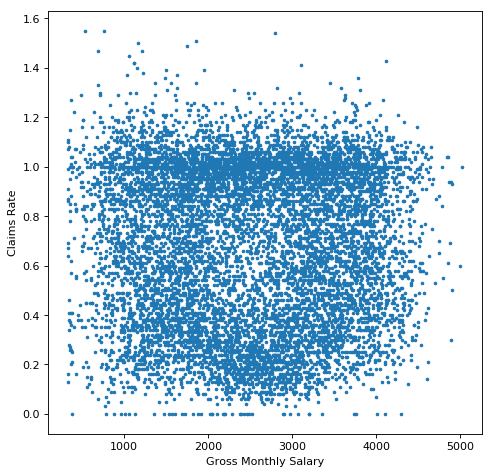

In [27]:
# Ploting variables

plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')

x = 0 # Select the variable that goes into the X axis in the graph.
y = 1 # Select the variable that goes into the Y axis in the graph.

plt.scatter(features_df.iloc[:, x], features_df.iloc[:, y], s=5, cmap='viridis')
plt.xlabel(features_df.columns[x], fontsize=10)
plt.ylabel(features_df.columns[y], fontsize=10)

plt.show()

#### 3.1.2 - Scaling
K-means clustering is "isotropic" in all directions of space and therefore tends to produce more or less round (rather than elongated) clusters. In this situation leaving variances unequal is equivalent to putting more weight on variables with smaller variance. So we scale the variables in order to remove the difference in magnitude of the clustering analysis.

In [28]:
scaled_features = StandardScaler().fit_transform(features_df.values)
scaled_features_df = pd.DataFrame(scaled_features, index=features_df.index, columns=features_df.columns)
scaled_features_df.describe()

,Gross Monthly Salary,Claims Rate
count,9972.00,9972.00
mean,-0.00,-0.00
std,1.00,1.00
min,-2.19,-2.15
25%,-0.81,-0.92
50%,0.00,0.12
75%,0.81,0.94
max,2.56,2.74


#### 3.1.3 - Elbow Graph

In [29]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter=1000, init = 'k-means++', 
                    random_state = 12345)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

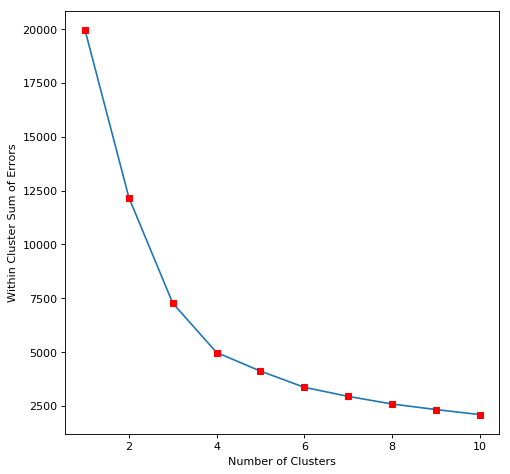

In [30]:
# Plot the Elbow Graph
plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')

plt.plot(range(1, 11), wcss)
plt.plot(range(1, 11), wcss, "rs")

plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum of Errors")

plt.show()

The Elbow Graph indicates some number between 3 and 5 clusters. Lets see what the Dendogram tells us.

#### 3.1.4 - Hierarchical (Dendrogram)

This might help us choose the number of clusters to optimize the clustering process.

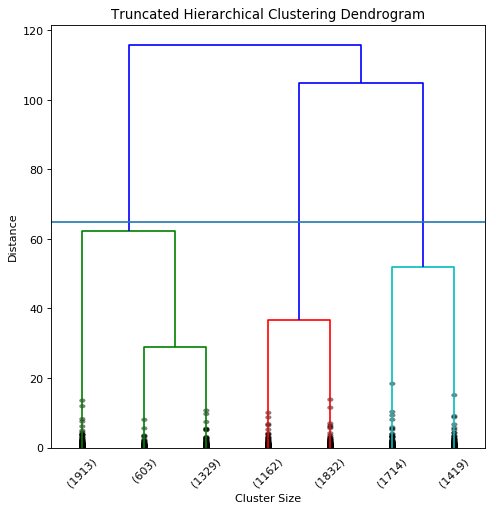

In [31]:
Z = linkage(scaled_features_df,
            method = 'ward')

plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')

dendrogram(Z,
           truncate_mode='lastp',
           p=7,
           orientation = 'top',
           leaf_rotation=45.,
           leaf_font_size=10.,
           show_contracted=True,
           show_leaf_counts=True)

plt.title('Truncated Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=65)


plt.show()

Even though it is clear that 3 clusters is where we maximize the distance between forks of new clusters, for our purposes of separating the clients in 4 quadrants (see next plot) and group them into High-Low Claims Rate and Salary 4 is the best numer of clusters.

#### 3.1.5 - K-Means

In [32]:
# Setting up the K-Means model:

kmeans = KMeans(n_clusters=4, max_iter=1000, random_state=12345, init = 'k-means++') # Set the number of clusters we want, the maximum number of iteration and a seed for the random state.
kmeans.fit(scaled_features_df)
labels = kmeans.labels_

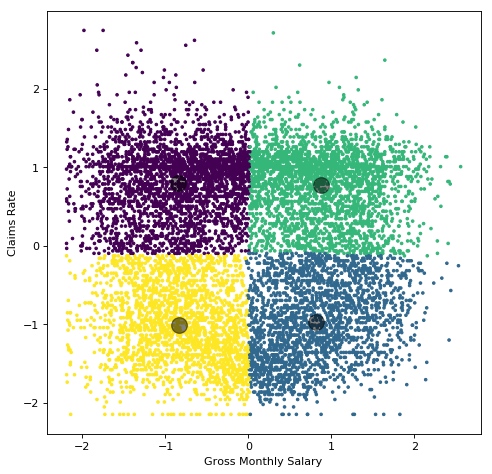

In [33]:
# Plotting the resulting clusters:

plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')

x = 0 # Select the variable that goes into the X axis in the graph.
y = 1 # Select the variable that goes into the Y axis in the graph.
plt.scatter(scaled_features_df.iloc[:, x], scaled_features_df.iloc[:, y], c=labels, s=5, cmap='viridis')

centers_cv = kmeans.cluster_centers_
plt.scatter(centers_cv[:, x], centers_cv[:, y], c='black', s=200, alpha=0.5);
plt.xlabel(scaled_features_df.columns[x], fontsize=10)
plt.ylabel(scaled_features_df.columns[y], fontsize=10)

plt.show()

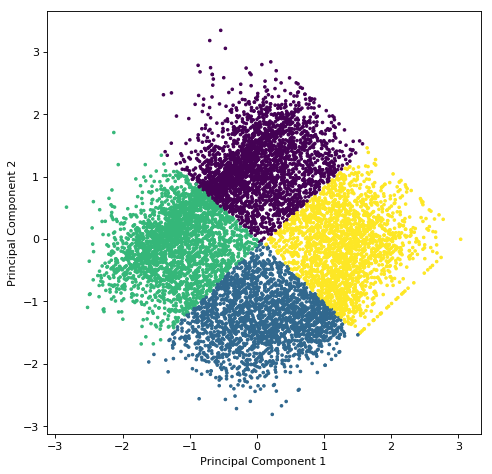

In [34]:
plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_features_df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])


plt.scatter(principalDf.iloc[:, 0], principalDf.iloc[:, 1], c=labels, s=5, cmap='viridis')
plt.xlabel(principalDf.columns[0], fontsize=10)
plt.ylabel(principalDf.columns[1], fontsize=10)
plt.show()

In [35]:
Counter(labels)

Counter({3: 2190, 0: 2812, 2: 2734, 1: 2236})

These Clusters seem to be dividing well the data points based on Claims Rate and Gross Monthly Salary.

### 3.2 Clustering Consumption

#### 3.2.1 - Select the features

In [36]:
featuresCons = data[['Premiums in LOB: Motor','Premiums in LOB: Household','Premiums in LOB: Health',
                     'Premiums in LOB:  Life','Premiums in LOB: Work Compensations']]
featuresCons.describe()

,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
count,9972.00,9972.00,9972.00,9972.00,9972.00
mean,0.44,0.32,0.25,0.06,0.06
std,0.21,0.35,0.11,0.07,0.07
min,0.00,0.00,0.00,0.00,0.00
25%,0.28,0.08,0.17,0.01,0.02
50%,0.45,0.20,0.24,0.04,0.04
75%,0.61,0.44,0.33,0.09,0.09
max,0.88,3.34,0.67,0.60,0.74


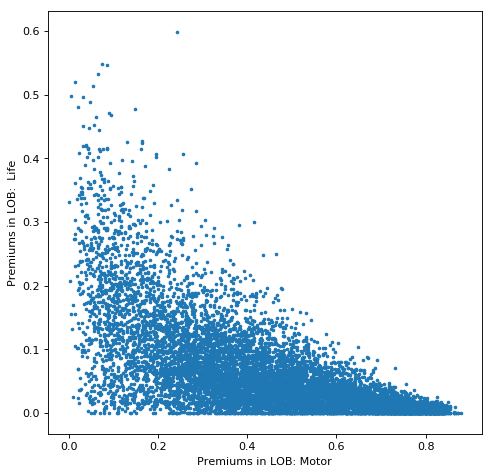

In [37]:
plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')

x = 0 # Select the variable that goes into the X axis in the graph.
y = 3 # Select the variable that goes into the Y axis in the graph.

plt.scatter(featuresCons.iloc[:, x], featuresCons.iloc[:, y], s=5, cmap='viridis')
plt.xlabel(featuresCons.columns[x], fontsize=10)
plt.ylabel(featuresCons.columns[y], fontsize=10)

plt.show()

##### Using PCA to show 5 variables in a 2D space:

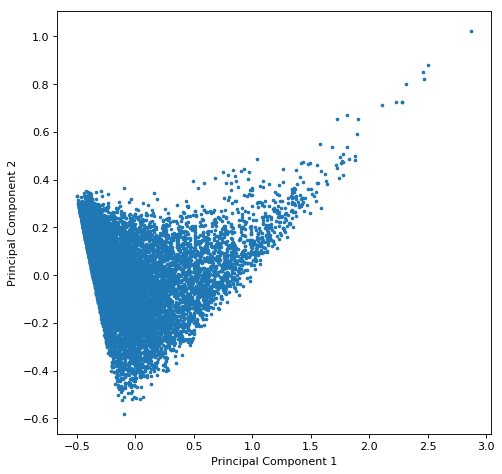

In [38]:
plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(featuresCons)
principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])


plt.scatter(principalDf.iloc[:, 0], principalDf.iloc[:, 1], s=5, cmap='viridis')
plt.xlabel(principalDf.columns[0], fontsize=10)
plt.ylabel(principalDf.columns[1], fontsize=10)
plt.show()

#### 3.2.2 - Scaling
K-means clustering is "isotropic" in all directions of space and therefore tends to produce more or less round (rather than elongated) clusters. In this situation leaving variances unequal is equivalent to putting more weight on variables with smaller variance. So we scale the variables in order to remove the difference in magnitude of the clustering analysis.

In [39]:
scaled_featuresCons = StandardScaler().fit_transform(featuresCons.values)
scaled_featuresCons = pd.DataFrame(scaled_featuresCons, index=featuresCons.index, columns=featuresCons.columns)
scaled_featuresCons.describe()

,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
count,9972.00,9972.00,9972.00,9972.00,9972.00
mean,-0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00
min,-2.15,-0.91,-2.28,-0.89,-0.89
25%,-0.77,-0.68,-0.76,-0.68,-0.66
50%,0.01,-0.34,-0.07,-0.35,-0.33
75%,0.80,0.35,0.69,0.33,0.33
max,2.11,8.59,3.70,7.51,9.70


#### 3.2.3 - Elbow Graph

In [40]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter=1000, init = 'k-means++', 
                    random_state = 12345)
    kmeans.fit(scaled_featuresCons)
    wcss.append(kmeans.inertia_)

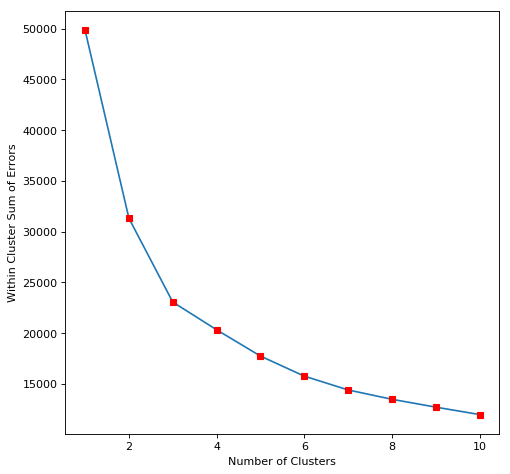

In [41]:
# Plot the Elbow Graph
plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')

plt.plot(range(1, 11), wcss)
plt.plot(range(1, 11), wcss, "rs")

plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum of Errors")

plt.show()

The Elbow Graph seems to be indicating a number between 2 and 5 for number of clusters. Lets see what the Dendogram shows.

#### 3.2.4 - Hierarchical (Dendogram)
This might help us decide the number of clusters.

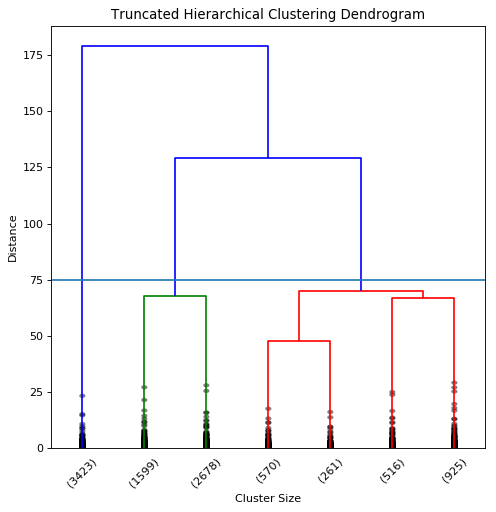

In [42]:
Z = linkage(scaled_featuresCons,
            method = 'ward')

plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')

dendrogram(Z,
           truncate_mode='lastp',
           p=7,
           orientation = 'top',
           leaf_rotation=45.,
           leaf_font_size=10.,
           show_contracted=True,
           show_leaf_counts=True)

plt.title('Truncated Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=75)


plt.show()

Again, 3 seems to be the best number of clusters.

#### We tested with 4 and it doesnt work, so it is either 3 or 2 clusters!!

#### 3.2.5 - K-Means

In [43]:
# Setting up the K-Means model:

kmeans_Cons = KMeans(n_clusters=3, max_iter=1000, random_state=12345, init = 'k-means++') # Set the number of clusters we want, the maximum number of iteration and a seed for the random state.
kmeans_Cons.fit(scaled_featuresCons)
labels_Cons = kmeans_Cons.labels_

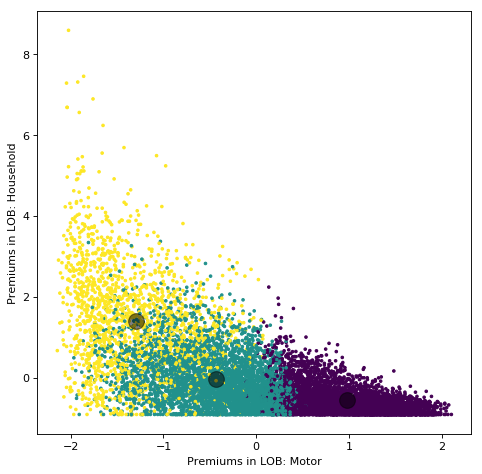

In [44]:
# Plotting the resulting clusters

plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')

x = 0 # Select the variable that goes into the X axis in the graph.
y = 1 # Select the variable that goes into the Y axis in the graph.

plt.scatter(scaled_featuresCons.iloc[:, x], scaled_featuresCons.iloc[:, y], c=labels_Cons, s=5, cmap='viridis')

centers_con = kmeans_Cons.cluster_centers_
plt.scatter(centers_con[:, x], centers_con[:, y], c='black', s=200, alpha=0.5);
plt.xlabel(scaled_featuresCons.columns[x], fontsize=10)
plt.ylabel(scaled_featuresCons.columns[y], fontsize=10)
plt.show()

##### Using PCA to show 5 variables in a 2D space:

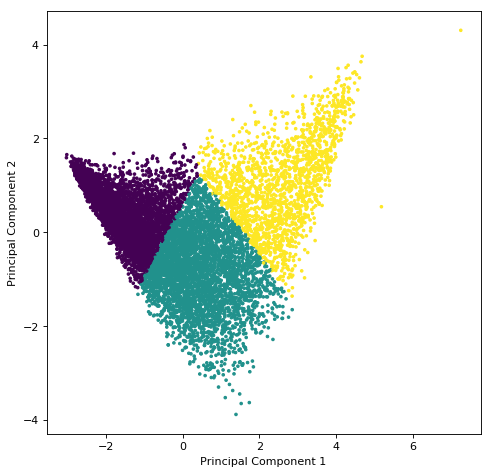

In [45]:
plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_featuresCons)
principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])


plt.scatter(principalDf.iloc[:, 0], principalDf.iloc[:, 1], c=labels_Cons, s=5, cmap='viridis')
plt.xlabel(principalDf.columns[0], fontsize=10)
plt.ylabel(principalDf.columns[1], fontsize=10)
plt.show()

In [46]:
Counter(labels_Cons)

Counter({0: 4137, 2: 1749, 1: 4086})

Even though cluster 2 has less data points than the others, the scatterplot of the PCA in 2 dimensions seems to indicate that the clusters divide the Premiums variables well.

### 3.3 Clustering Categories

#### 3.3.1 - Select the features

In [47]:
featureModes = data[['Geographic Living Area', 'Has Children (Y=1)', 'Educational Degree']] # All categoric variables.

Since these are categorical variables, there is no need of scaling.

#### 3.3.2 - K-Modes

As the other two cluster groups we chose 3 clusters, we should stick to this number now.

In [48]:
# Setting up K-Modes:
km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)

labels_Cat = km.fit_predict(featureModes)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 9315.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1867, cost: 8843.0
Run 2, iteration: 2/100, moves: 0, cost: 8843.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2354, cost: 8445.0
Run 3, iteration: 2/100, moves: 0, cost: 8445.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 956, cost: 9321.0
Run 4, iteration: 2/100, moves: 0, cost: 9321.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 548, cost: 8920.0
Run 5, iteration: 2/100, moves: 0, cost: 8920.0
Best run was number 3


In [49]:
Counter(labels_Cat)

Counter({0: 4967, 2: 2206, 1: 2799})

## 4 - Mean-Shift Clustering (Just testing to show that doesnt work that well)

### 4.1 - Value Clusters

In [50]:
my_bandwidth = estimate_bandwidth(scaled_features_df,
                               quantile=0.2,
                               n_samples=1000)

ms = MeanShift(bandwidth=my_bandwidth,
               bin_seeding=True)

ms.fit(scaled_features_df)
labels_ms = ms.labels_
ms_cluster_centers = ms.cluster_centers_

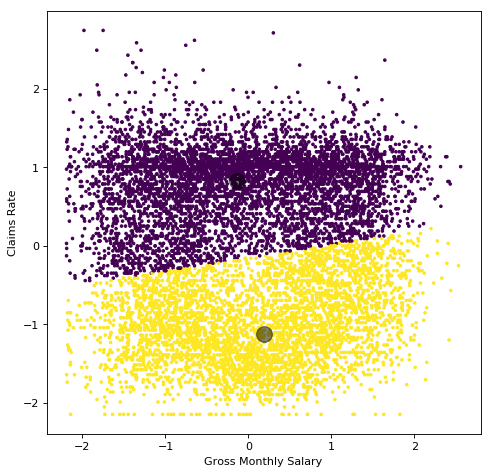

In [51]:
# Plotting the resulting clusters

plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')

x = 0 # Select the variable that goes into the X axis in the graph.
y = 1 # Select the variable that goes into the Y axis in the graph.

plt.scatter(scaled_features_df.iloc[:, x], scaled_features_df.iloc[:, y], c=labels_ms, s=5, cmap='viridis')

centers_ms_cv = ms_cluster_centers
plt.scatter(centers_ms_cv[:, x], centers_ms_cv[:, y], c='black', s=200, alpha=0.5);
plt.xlabel(scaled_features_df.columns[x], fontsize=10)
plt.ylabel(scaled_features_df.columns[y], fontsize=10)
plt.show()

In [52]:
Counter(labels_ms)

Counter({1: 4333, 0: 5639})

In [53]:
data.groupby(labels_ms).mean().loc[:,["Claims Rate", "Gross Monthly Salary", "TotalSpent", "Time"]]

,Claims Rate,Gross Monthly Salary,TotalSpent,Time
0,0.92,2415.47,755.10,30.08
1,0.36,2602.56,766.60,29.86


MS Clustering finds only two clusters when clustering customer value for the company.

The found clusters are dividing the data points mainly based on Claims Rate, while just slightly considering Gross Monthly Salary into the clustering. Considering this, not that good of a clustering.

### 4.2 - Consumption Clusters

In [54]:
my_bandwidth = estimate_bandwidth(scaled_featuresCons,
                               quantile=0.2,
                               n_samples=1000)

ms = MeanShift(bandwidth=my_bandwidth,
               bin_seeding=True)

ms.fit(scaled_featuresCons)
labels_ms_Cons = ms.labels_
ms_cluster_centers = ms.cluster_centers_


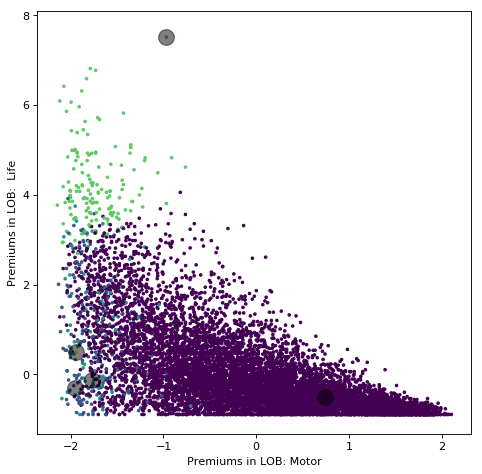

In [55]:
# Plotting the resulting clusters

plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')

x = 0 # Select the variable that goes into the X axis in the graph.
y = 3 # Select the variable that goes into the Y axis in the graph.

plt.scatter(scaled_featuresCons.iloc[:, x], scaled_featuresCons.iloc[:, y], c=labels_ms_Cons, s=5, cmap='viridis')

centers_ms_con = ms_cluster_centers
plt.scatter(centers_ms_con[:, x], centers_ms_con[:, y], c='black', s=200, alpha=0.5);
plt.xlabel(scaled_featuresCons.columns[x], fontsize=10)
plt.ylabel(scaled_featuresCons.columns[y], fontsize=10)
plt.show()

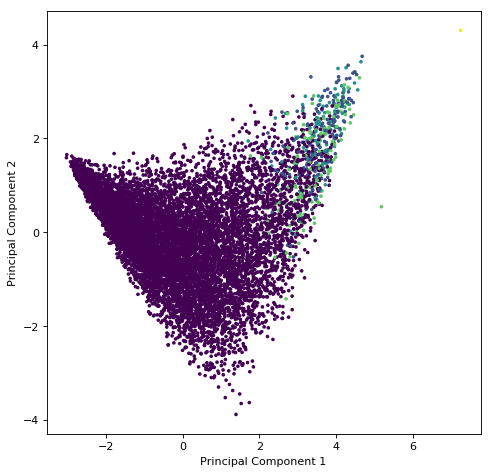

In [56]:
plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_featuresCons)
principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])


plt.scatter(principalDf.iloc[:, 0], principalDf.iloc[:, 1], c=labels_ms_Cons, s=5, cmap='viridis')
centers = ms_cluster_centers
plt.xlabel(principalDf.columns[0], fontsize=10)
plt.ylabel(principalDf.columns[1], fontsize=10)
plt.show()

In [57]:
Counter(labels_ms_Cons)

Counter({0: 9539, 3: 152, 2: 92, 1: 188, 4: 1})

In [58]:
data.groupby(labels_Cat).mean().loc[:,["Premiums in LOB: Motor","Premiums in LOB: Household",
                                        "Premiums in LOB: Health",'Premiums in LOB:  Life',
                                        "Premiums in LOB: Work Compensations", "TotalSpent",
                                        "Claims Rate", "Gross Monthly Salary", "Time"]]

,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations,TotalSpent,Claims Rate,Gross Monthly Salary,Time
0,0.43,0.35,0.25,0.07,0.07,778.24,0.68,2318.54,30.01
1,0.52,0.24,0.22,0.05,0.05,718.72,0.66,2236.00,30.02
2,0.38,0.34,0.30,0.07,0.07,771.75,0.70,3228.92,29.88


Even though MS Clustering found 4 clusters for the Consumption variables, the cluster 0 holds more than 90% of all data, while the cluster 3 holds only 1 row.

The graphs are not promising.

These clusters cant separate much.

Every result indicates that MS Clustering doest not work well with Consumption variables.

In the end, MS CLustering does not seem like a good alternative for our project.

## 5 - Analysis of Clusters

### 5.1 - Cross Table: Value Clusters X Consumption Clusters

In [59]:
pd.crosstab(labels, labels_Cons, rownames=["Customer_Value"], colnames=["Consumption"])

Consumption,0,1,2
Customer_Value,,,
0,952,1147,713
1,1101,904,231
2,1181,1295,258
3,903,740,547


### 5.2 - Cross Table: Value Clusters X Category Clusters

In [60]:
pd.crosstab(labels, labels_Cat, rownames=["Customer_Value"], colnames=["Demographic"])

Demographic,0,1,2
Customer_Value,,,
0,1628,955,229
1,976,502,758
2,1141,559,1034
3,1222,783,185


### 5.3 - Cross Table: Category Clusters X Consumption Clusters

In [61]:
pd.crosstab(labels_Cat, labels_Cons, rownames=["Demographic"], colnames=["Consumption"])

Consumption,0,1,2
Demographic,,,
0,1952,1951,1064
1,1631,870,298
2,554,1265,387


### 5.4 - Cross Table: Categorical Variables x Value Clusters

In [62]:
pd.crosstab(labels, data["Educational Degree"], normalize = "index", rownames=["Customer_Value"])

Educational Degree,1 - Basic,2 - High School,3 - BSc/MSc,4 - PhD
Customer_Value,,,,
0,0.17,0.36,0.41,0.06
1,0.08,0.33,0.51,0.08
2,0.08,0.35,0.49,0.07
3,0.17,0.32,0.45,0.06


In [63]:
pd.crosstab(labels, data["Has Children (Y=1)"],normalize='index',  rownames=["Customer_Value"])

Has Children (Y=1),0.0,1.0
Customer_Value,,
0,0.12,0.88
1,0.45,0.55
2,0.49,0.51
3,0.12,0.88


In [64]:
pd.crosstab(labels, data["Geographic Living Area"], normalize='index', rownames=["Customer_Value"])

Geographic Living Area,1.0,2.0,3.0,4.0
Customer_Value,,,,
0,0.30,0.10,0.21,0.40
1,0.31,0.10,0.20,0.40
2,0.28,0.11,0.19,0.42
3,0.31,0.09,0.20,0.40


### 5.5 - Cross Table: Categorical Variables x Consumption Clusters

In [65]:
pd.crosstab(labels_Cons, data["Educational Degree"], normalize='index', rownames=["Consumption"])

Educational Degree,1 - Basic,2 - High School,3 - BSc/MSc,4 - PhD
Consumption,,,,
0,0.04,0.25,0.59,0.11
1,0.08,0.39,0.48,0.05
2,0.41,0.45,0.13,0.00


In [66]:
pd.crosstab(labels_Cons, data['Has Children (Y=1)'], normalize='index', rownames=["Consumption"])

Has Children (Y=1),0.0,1.0
Consumption,,
0,0.16,0.84
1,0.41,0.59
2,0.35,0.65


In [67]:
pd.crosstab(labels_Cons, data["Geographic Living Area"], normalize='index', rownames=["Consumption"])

Geographic Living Area,1.0,2.0,3.0,4.0
Consumption,,,,
0,0.30,0.10,0.21,0.40
1,0.30,0.10,0.19,0.41
2,0.29,0.09,0.20,0.41


### 5.6 - Cross Table: Categorical Variables x Category Clusters (Maybe this is useless, doesnt make sense)

In [68]:
pd.crosstab(labels_Cat, data["Educational Degree"], normalize="index", rownames=["Demographic"])

Educational Degree,1 - Basic,2 - High School,3 - BSc/MSc,4 - PhD
Demographic,,,,
0,0.13,0.60,0.20,0.07
1,0.12,0.00,0.81,0.06
2,0.13,0.20,0.61,0.06


In [69]:
pd.crosstab(labels_Cat, data["Has Children (Y=1)"], normalize="index", rownames=["Demographic"])

Has Children (Y=1),0.0,1.0
Demographic,,
0,0.15,0.85
1,0.00,1.00
2,1.00,0.00


In [70]:
pd.crosstab(labels_Cat, data["Geographic Living Area"], normalize="index", rownames=["Demographic"])

Geographic Living Area,1.0,2.0,3.0,4.0
Demographic,,,,
0,0.52,0.09,0.19,0.20
1,0.00,0.11,0.24,0.64
2,0.18,0.09,0.17,0.56


### 5.7 - Continuous Variables Grouped by Clusters

##### 5.7.1 - Grouped by Customer_Value Clusters

In [73]:
data.groupby(labels).mean().loc[:,["Claims Rate", "Gross Monthly Salary", "Premiums in LOB: Motor",
                                                    "Premiums in LOB: Work Compensations", "TotalSpent", "Time"]]

,Claims Rate,Gross Monthly Salary,Premiums in LOB: Motor,Premiums in LOB: Work Compensations,TotalSpent,Time
0,0.93,1654.18,0.40,0.08,778.50,30.05
1,0.37,3305.73,0.49,0.05,738.66,29.82
2,0.93,3362.79,0.47,0.05,727.71,30.05
3,0.36,1671.56,0.43,0.07,798.78,29.98


##### 5.7.2 - Grouped by Consumption Clusters

In [76]:
data.groupby(labels_Cons).mean().loc[:,["Premiums in LOB: Motor","Premiums in LOB: Household",
                                        "Premiums in LOB: Health",'Premiums in LOB:  Life',
                                        "Premiums in LOB: Work Compensations", "TotalSpent",
                                        "Claims Rate"]]

,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations,TotalSpent,Claims Rate
0,0.65,0.13,0.17,0.02,0.02,657.83,0.64
1,0.35,0.30,0.35,0.06,0.06,751.35,0.72
2,0.17,0.81,0.23,0.16,0.16,1022.44,0.68


##### 5.7.3 - Grouped by Demographic Clusters

In [77]:
data.groupby(labels_Cat).mean().loc[:,["Premiums in LOB: Motor","Premiums in LOB: Household",
                                        "Premiums in LOB: Health",'Premiums in LOB:  Life',
                                        "Premiums in LOB: Work Compensations", "TotalSpent",
                                        "Claims Rate", "Gross Monthly Salary", "Time"]]

,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations,TotalSpent,Claims Rate,Gross Monthly Salary,Time
0,0.43,0.35,0.25,0.07,0.07,778.24,0.68,2318.54,30.01
1,0.52,0.24,0.22,0.05,0.05,718.72,0.66,2236.00,30.02
2,0.38,0.34,0.30,0.07,0.07,771.75,0.70,3228.92,29.88


## 6 - Conclusions (Partial)

#### 6.1 - Customer_Value Clusters

In [79]:
pd.crosstab(labels, data["Has Children (Y=1)"], normalize='index', rownames=["Customer_Value"])

Has Children (Y=1),0.0,1.0
Customer_Value,,
0,0.12,0.88
1,0.45,0.55
2,0.49,0.51
3,0.12,0.88


The only categorical variable that seems to have any connection to these clusters is the Has Children variable, in which the cluster 2 shows a more balanced distribution of presence of children, while the clusters 0 and 1 show great tendency towards having children.

In [82]:
data.groupby(labels).mean().loc[:,["Claims Rate", "Gross Monthly Salary", "Premiums in LOB: Motor", "Premiums in LOB: Health",
                                                    "Premiums in LOB: Work Compensations", "TotalSpent", "Time"]]

,Claims Rate,Gross Monthly Salary,Premiums in LOB: Motor,Premiums in LOB: Health,Premiums in LOB: Work Compensations,TotalSpent,Time
0,0.93,1654.18,0.40,0.26,0.08,778.50,30.05
1,0.37,3305.73,0.49,0.24,0.05,738.66,29.82
2,0.93,3362.79,0.47,0.26,0.05,727.71,30.05
3,0.36,1671.56,0.43,0.24,0.07,798.78,29.98


We can see that these 3 clusters can divide the Claims Rate and Gross Monthly Salary very well, which was the point of this clusterization. It barely has any effect on Premium variables and TotalSpent, which was created using these variables. Has no effect over the Time variable whatsoever.

#### 6.2 - Consumption Clusters

In [86]:
pd.crosstab(labels_Cons, data["Educational Degree"], normalize='index', rownames=["Consumption"])

Educational Degree,1 - Basic,2 - High School,3 - BSc/MSc,4 - PhD
Consumption,,,,
0,0.04,0.25,0.59,0.11
1,0.08,0.39,0.48,0.05
2,0.41,0.45,0.13,0.00


In [88]:
pd.crosstab(labels_Cons, data['Has Children (Y=1)'], normalize='index', rownames=["Consumption"])

Has Children (Y=1),0.0,1.0
Consumption,,
0,0.16,0.84
1,0.41,0.59
2,0.35,0.65


It seems that both Educational Degree and Has Children show a different behavior when comparing the Consumption Clusters. While cluster 2 hold the majority of clients with Basic education and no PhD client, the cluster 0 seems to be the more educated one.

Regarding children, the cluster 0 represents the clients that predominantly have children, while both other clusters show a more balanced distribution, even if a little more on the having children side.

In [89]:
data.groupby(labels_Cons).mean().loc[:,["Premiums in LOB: Motor","Premiums in LOB: Household",
                                        "Premiums in LOB: Health",'Premiums in LOB:  Life',
                                        "Premiums in LOB: Work Compensations", "TotalSpent", "Gross Monthly Salary"]]

,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations,TotalSpent,Gross Monthly Salary
0,0.65,0.13,0.17,0.02,0.02,657.83,2625.57
1,0.35,0.30,0.35,0.06,0.06,751.35,2646.17
2,0.17,0.81,0.23,0.16,0.16,1022.44,1843.05


These clusters seem to be able to divide well all premiums variables as well as the TotalSpent variable. As expected, does not seem to divide the Claims Rate variable so well.

#### 6.3 - Demographic Clusters

In [92]:
data.groupby(labels_Cat).mean().loc[:,["Premiums in LOB: Motor","Premiums in LOB: Household",
                                        "Premiums in LOB: Health",'Premiums in LOB:  Life',
                                        "Premiums in LOB: Work Compensations", "TotalSpent",
                                        "Claims Rate", "Gross Monthly Salary", "Time"]]

,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations,TotalSpent,Claims Rate,Gross Monthly Salary,Time
0,0.43,0.35,0.25,0.07,0.07,778.24,0.68,2318.54,30.01
1,0.52,0.24,0.22,0.05,0.05,718.72,0.66,2236.00,30.02
2,0.38,0.34,0.30,0.07,0.07,771.75,0.70,3228.92,29.88


The clusters based on categorical data do not seem to divide any other variable meaningfully.

#### 6.4 - General Conclusions

In the end, Mean-Shift Clustering did not present as a suitable option as a clustering method, while K-Means showed promising clusters.

The K-Means clusters based on Customer_Value variables produced good results, as did the clusters based on Consumption variables. The K-Modes clusters based on Demographic variables did not show useful results. Maybe the K-Modes algorithm used doesnt work well with the kind of data we are using.

The Geographical Living Area does not show any meaningful behaviour with any of the Customer_Value and Consumption clusters. Time variable seems to be useless, since it doesnt seem to interact with any cluster whatsoever.

### Naming The Customer_Value Clusters

In [93]:
lab = np.repeat("aaaaaa a aaaa aaa a aaaaa aaaaaaaaa", labels.size)

for i in range(0, lab.size):
    if(labels[i]==0):
        lab[i] = "Bad Clients"
    elif(labels[i]==1):
        lab[i] = "Good Clients"
    elif(labels[i]==2):
        lab[i] = "Potencial Clients" 
    else:
        lab[i] = "Stable Clients"
        
lab

array(['Stable Clients', 'Bad Clients', 'Stable Clients', ...,
       'Good Clients', 'Bad Clients', 'Good Clients'], dtype='<U35')

In [94]:
data.groupby(lab).mean().loc[:,["Claims Rate", "Gross Monthly Salary", "Premiums in LOB: Motor", "Premiums in LOB: Health",
                                                    "Premiums in LOB: Work Compensations", "TotalSpent", "Time"]]

,Claims Rate,Gross Monthly Salary,Premiums in LOB: Motor,Premiums in LOB: Health,Premiums in LOB: Work Compensations,TotalSpent,Time
Bad Clients,0.93,1654.18,0.40,0.26,0.08,778.50,30.05
Good Clients,0.37,3305.73,0.49,0.24,0.05,738.66,29.82
Potencial Clients,0.93,3362.79,0.47,0.26,0.05,727.71,30.05
Stable Clients,0.36,1671.56,0.43,0.24,0.07,798.78,29.98


### Naming The Consumption Clusters

In [95]:
lab_con = np.repeat("aaaaaa a aaaa aaa a aaaaa aaaaaaaa", labels_Cons.size)

for i in range(0, lab_con.size):
    if(labels_Cons[i]==0):
        lab_con[i] = "Motor"
    elif(labels_Cons[i]==1):
        lab_con[i] = "Health" 
    else:
        lab_con[i] = "Household"
        
lab_con

array(['Motor', 'Household', 'Household', ..., 'Motor', 'Health', 'Motor'],
      dtype='<U34')

In [96]:
data.groupby(lab_con).mean().loc[:,["Claims Rate", "Gross Monthly Salary", "Premiums in LOB: Motor", "Premiums in LOB: Health",
                                                    "Premiums in LOB: Work Compensations", "TotalSpent"]]

,Claims Rate,Gross Monthly Salary,Premiums in LOB: Motor,Premiums in LOB: Health,Premiums in LOB: Work Compensations,TotalSpent
Health,0.72,2646.17,0.35,0.35,0.06,751.35
Household,0.68,1843.05,0.17,0.23,0.16,1022.44
Motor,0.64,2625.57,0.65,0.17,0.02,657.83


### Cross Table of both Cluster Groups

In [97]:
pd.crosstab(lab, lab_con, rownames=["Customer_Value"], colnames=["Consumption"])

Consumption,Health,Household,Motor
Customer_Value,,,
Bad Clients,1147,713,952
Good Clients,904,231,1101
Potencial Clients,1295,258,1181
Stable Clients,740,547,903


# EVERYTHING UNDER THIS IS JUST TESTING!!!!!

## Testing K-Modes with more variables than only the Categorical Ones (didnt work well too):

In [103]:
featureModes_ = data[['Geographic Living Area', 'Has Children (Y=1)', 'Educational Degree',
                     "TotalSpent", "Claims Rate"]] # All categoric variables.

In [104]:
km_ = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)

labels_Cat_ = km.fit_predict(featureModes_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 87, cost: 28682.0
Run 1, iteration: 2/100, moves: 0, cost: 28682.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3209, cost: 28304.0
Run 2, iteration: 2/100, moves: 0, cost: 28304.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 101, cost: 28802.0
Run 3, iteration: 2/100, moves: 0, cost: 28802.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 805, cost: 28596.0
Run 4, iteration: 2/100, moves: 0, cost: 28596.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 484, cost: 31145.0
Run 5, iteration: 2/100, moves: 0, cost: 31145.0
Best run was number 2


In [105]:
data.groupby(labels_Cat).mean().loc[:,["Premiums in LOB: Motor","Premiums in LOB: Household",
                                        "Premiums in LOB: Health",'Premiums in LOB:  Life',
                                        "Premiums in LOB: Work Compensations", "TotalSpent",
                                        "Claims Rate", "Gross Monthly Salary", "Time"]]

,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations,TotalSpent,Claims Rate,Gross Monthly Salary,Time
0,0.43,0.35,0.25,0.07,0.07,778.24,0.68,2318.54,30.01
1,0.52,0.24,0.22,0.05,0.05,718.72,0.66,2236.00,30.02
2,0.38,0.34,0.30,0.07,0.07,771.75,0.70,3228.92,29.88


## Testing EM Clustering
We shouldnt really use this method, even if this is a "K-Means 2.0", because it is more useful for its soft choices (probabilities of falling into each cluster), which we wouldnt be using. It is also useful for predicting a cluster for a new point\client.

In [106]:
gmm = mixture.GaussianMixture(n_components=4,
                              covariance_type='full',
                              init_params='kmeans',
                              max_iter=1000, random_state=12345)
gmm.fit(scaled_features_df)
EM_labels_ = gmm.predict(scaled_features_df)

In [107]:
unique_clusters, counts_clusters = np.unique(EM_labels_, return_counts = True)
print(np.asarray((unique_clusters, counts_clusters)).T) # Count for points in each cluster.

[[   0 2162]
 [   1 2559]
 [   2 2500]
 [   3 2751]]


In [108]:
#Check the distribution
gmm.weights_ # Weights

array([0.22165462, 0.25914324, 0.24334998, 0.27585215])

In [109]:
gmm.means_ # Means of clusters (Salary | Claims Rate)

array([[-0.81871458, -0.94568164],
       [ 0.79640285,  0.82130703],
       [ 0.79400612, -0.91042951],
       [-0.79075661,  0.79148032]])

In [110]:
# Predict the Cluste in which a new point would fall into (Probabilities of falling in each cluster)
my_test = np.array([0.9,0.1]) # Choose any values for this, ranging from -1 to 1 (because of the MinMax Scaling)
gmm.predict_proba(my_test.reshape(1, -1))

array([[0.00108284, 0.60316203, 0.37560221, 0.02015292]])

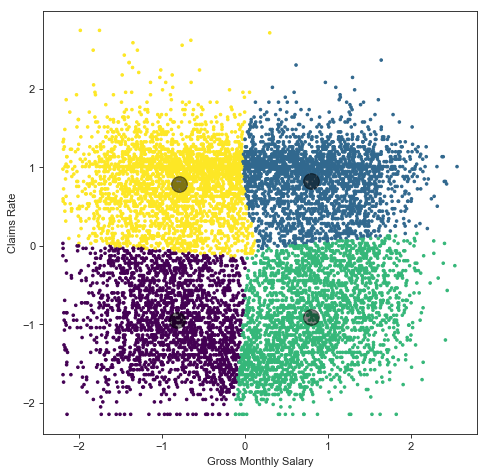

In [111]:
# Plotting the resulting clusters:

plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')

x = 0 # Select the variable that goes into the X axis in the graph.
y = 1 # Select the variable that goes into the Y axis in the graph.
plt.scatter(scaled_features_df.iloc[:, x], scaled_features_df.iloc[:, y], c=EM_labels_, s=5, cmap='viridis')

centers_cv = gmm.means_
plt.scatter(centers_cv[:, x], centers_cv[:, y], c='black', s=200, alpha=0.5);
plt.xlabel(scaled_features_df.columns[x], fontsize=10)
plt.ylabel(scaled_features_df.columns[y], fontsize=10)

plt.show()

In [112]:
lab_con.size

9972